<a href="https://colab.research.google.com/github/anyuanay/INFO371/blob/main/INFO371_Week5_FeatureE_EnsembleL_CrossV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 371: Data Mining Applications

## Week 5: Feature Engineering, DT, Random Forest
### Prof. Y. An, PhD
### College of Computing and Informatics, Drexel University

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

## Collecting the data
The data we will be using is the match history data for the NBA for the 2015-2016 season.

The website [http://basketball-reference.com](http://basketball-reference.com) contains a significant number of resources
and statistics collected from the NBA and other leagues.

To download the dataset, perform the following steps:
1. Navigate to [here](http://www.basketball-reference.com/leagues/NBA_2016_games.html) in your web browser.
2. Click Share & Export.
3. Click Get table as CSV (for Excel).
4. Copy the data, including the heading, into a text file named basketball.csv.
5. Repeat this process for the other months, except do not copy the heading.

This will give you a CSV file containing the results from each game of this season of the NBA. (My file contains 1316 games and a total of 1317 lines in the file, including the header line.)

In [2]:
# upload the NBA file
from google.colab import files
files.upload()

Saving nba-2016.csv to nba-2016.csv


{'nba-2016.csv': b'Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS,,,Attend.,Notes\r\nTue Oct 27 2015,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,,21957,\r\nTue Oct 27 2015,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,,19187,\r\nTue Oct 27 2015,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,,19596,\r\nWed Oct 28 2015,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,,18846,\r\nWed Oct 28 2015,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,,18624,\r\nWed Oct 28 2015,7:30p,Chicago Bulls,115,Brooklyn Nets,100,Box Score,,17732,\r\nWed Oct 28 2015,7:30p,Utah Jazz,87,Detroit Pistons,92,Box Score,,18434,\r\nWed Oct 28 2015,7:30p,Indiana Pacers,99,Toronto Raptors,106,Box Score,,19800,\r\nWed Oct 28 2015,7:30p,Charlotte Hornets,94,Miami Heat,104,Box Score,,19724,\r\nWed Oct 28 2015,8:00p,New York Knicks,122,Milwaukee Bucks,97,Box Score,,18717,\r\nWed Oct 28 2015,8:00p,San Antonio Spurs,106,Oklahoma City Thunder,112,Box Score,,18203,\r\

In [3]:
df = pd.read_csv('nba-2016.csv')
df.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,Tue Oct 27 2015,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,NaN
1,Tue Oct 27 2015,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,NaN
2,Tue Oct 27 2015,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,NaN
3,Wed Oct 28 2015,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,NaN
4,Wed Oct 28 2015,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,NaN


In [4]:
df.shape

(1316, 10)

## Parse date when loading and clean the column names

In [5]:
df = pd.read_csv('nba-2016.csv', parse_dates=["Date"])
df.columns = ["Date", "Start (ET)", "Visitor Team", "VisitorPts", \
"Home Team", "HomePts", "OT?", "Score Type", "Attend.", "Notes"]
df.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT?,Score Type,Attend.,Notes
0,2015-10-27,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,NaN
1,2015-10-27,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,NaN
2,2015-10-27,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,NaN
3,2015-10-28,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,NaN
4,2015-10-28,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,NaN


In [6]:
print(df.dtypes)

Date            datetime64[ns]
Start (ET)              object
Visitor Team            object
VisitorPts               int64
Home Team               object
HomePts                  int64
OT?                     object
Score Type              object
Attend.                  int64
Notes                   object
dtype: object


## Add a target column

In [7]:
df["HomeWin"] = df["VisitorPts"] < df["HomePts"]

In [8]:
df.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT?,Score Type,Attend.,Notes,HomeWin
0,2015-10-27,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,NaN,True
1,2015-10-27,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,NaN,False
2,2015-10-27,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,NaN,True
3,2015-10-28,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,NaN,False
4,2015-10-28,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,NaN,True


## Extract the target values

In [9]:
y_true = df["HomeWin"].values
y_true

array([ True, False,  True, ..., False,  True, False])

## What is the home team advantage in this data set?

In [10]:
df.HomeWin.mean()

0.5942249240121581

## Predict using team names

In [11]:
df['Home Team'].nunique()

30

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
onehot = OneHotEncoder()
onehot.fit(df[["Home Team"]])

OneHotEncoder()

In [19]:
X = onehot.transform(df[["Home Team"]]).toarray()

In [20]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
X.shape

(1316, 30)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_nba = DecisionTreeClassifier()

In [22]:
dt_nba.fit(X, y_true)

DecisionTreeClassifier()

In [23]:
!pip install -q dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.2 MB/s eta 0:00:00


In [24]:
import dtreeviz

## Visualize the Decision Tree

In [25]:
X_dummies = pd.get_dummies(df['Home Team'])

In [26]:
X_dummies.head()

,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,...,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
df[df['Home Team'] == 'Philadelphia 76ers'].shape, df[df['Home Team'] == 'Philadelphia 76ers'].HomeWin.sum()

((41, 11), 7)

In [28]:
df.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT?,Score Type,Attend.,Notes,HomeWin
0,2015-10-27,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,NaN,True
1,2015-10-27,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,NaN,False
2,2015-10-27,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,NaN,True
3,2015-10-28,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,NaN,False
4,2015-10-28,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,NaN,True


In [29]:
df.shape

(1316, 11)

In [30]:
df[df['Visitor Team'] == 'Philadelphia 76ers'].shape, df[df['Visitor Team'] == 'Philadelphia 76ers'].HomeWin.sum()

((41, 11), 38)

In [31]:
viz = dtreeviz.model(dt_nba,
               X_dummies,
               y_true,
               target_name='HomeWin',
               feature_names=X_dummies.columns,
               class_names=["No", "Yes"]
               )

/usr/local/lib/python3.11/dist-packages/dtreeviz/models/shadow_decision_tree.py:291: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7078: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7093: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


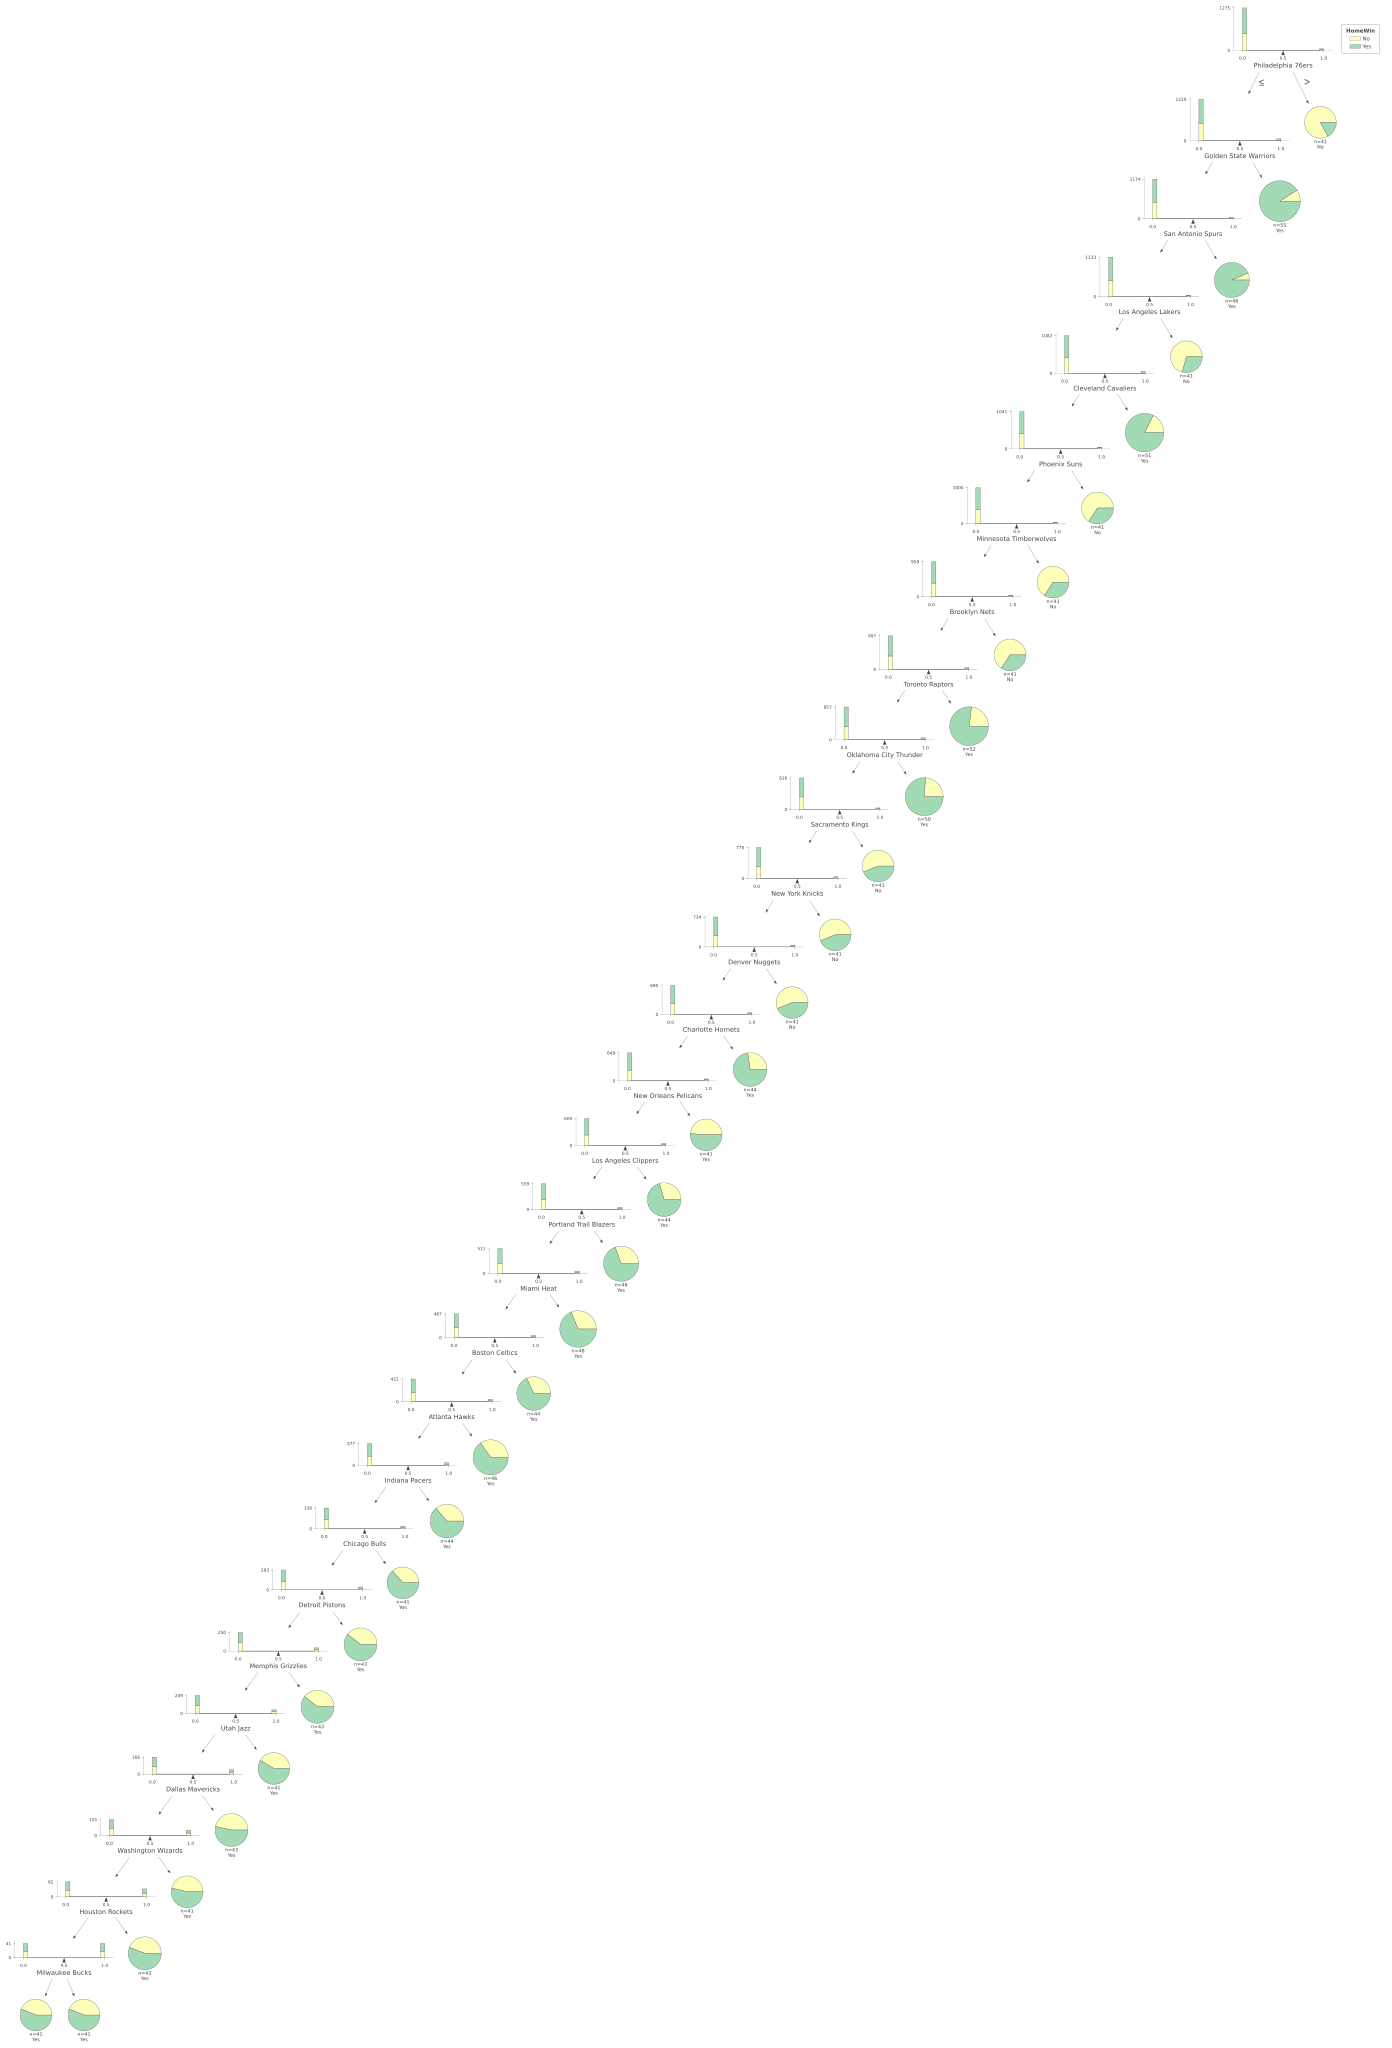

In [32]:
viz.view(scale=1.5)

## Evaluation
Evaluation should be done on a separate test data. Scikit Learn provides a convenient method for splitting arrays or matrices into random train and test subsets.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Split the given data set into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_true, test_size=0.2, random_state=42)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1052, 30), (264, 30), (1052,), (264,))

In [36]:
dt_nba = DecisionTreeClassifier()
dt_nba.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
X_test.head()

,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,...,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
198,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
184,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
y_pred = dt_nba.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_pred)

0.6136363636363636

## Cross Validation
A primary method to evaluate and select machine learning models on a limited data set. The K-Fold cross validation goes like:
- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
 - Take the group as a hold out or test data set
 - Take the remaining groups as a training data set
 - Fit a model on the training set and evaluate it on the test set
- Obtain the final score of the model using the scores on individual folds.

### Use the cross_val_score implemented in Scikit Learn

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
dt_nba = DecisionTreeClassifier()

In [43]:
scores= cross_val_score(dt_nba, X, y_true, cv=10, scoring='accuracy')

In [44]:
scores

array([0.6969697 , 0.65151515, 0.60606061, 0.65151515, 0.62878788,
       0.6969697 , 0.64885496, 0.67175573, 0.65648855, 0.65648855])

In [45]:
print("The accuracy of predicting on names: {}".format(np.mean(scores)))

The accuracy of predicting on names: 0.6565405968077723


In [46]:
df["HomeWin"].mean()

0.5942249240121581

## Create a new feature: who won the last game

In [47]:
df.columns

Index(['Date', 'Start (ET)', 'Visitor Team', 'VisitorPts', 'Home Team',
       'HomePts', 'OT?', 'Score Type', 'Attend.', 'Notes', 'HomeWin'],
      dtype='object')

In [48]:
df['HomeWonLast'] = 0 # did the home team win its last game?
df['VisitorWonLast'] = 0 # did the visitor team win its last game?

In [49]:
df.head(10)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT?,Score Type,Attend.,Notes,HomeWin,HomeWonLast,VisitorWonLast
0,2015-10-27,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,NaN,True,0,0
1,2015-10-27,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,NaN,False,0,0
2,2015-10-27,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,NaN,True,0,0
3,2015-10-28,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,NaN,False,0,0
4,2015-10-28,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,NaN,True,0,0
5,2015-10-28,7:30p,Chicago Bulls,115,Brooklyn Nets,100,Box Score,NaN,17732,NaN,False,0,0
6,2015-10-28,7:30p,Utah Jazz,87,Detroit Pistons,92,Box Score,NaN,18434,NaN,True,0,0
7,2015-10-28,7:30p,Indiana Pacers,99,Toronto Raptors,106,Box Score,NaN,19800,NaN,True,0,0
8,2015-10-28,7:30p,Charlotte Hornets,94,Miami Heat,104,Box Score,NaN,19724,NaN,True,0,0
9,2015-10-28,8:00p,New York Knicks,122,Milwaukee Bucks,97,Box Score,NaN,18717,NaN,False,0,0


In [50]:
from collections import defaultdict
won_last = defaultdict(int)

In [51]:
for index, row in df.sort_values("Date").iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    df.at[index, 'HomeWonLast'] = won_last[home_team]
    df.at[index, 'VisitorWonLast'] = won_last[visitor_team]
    won_last[home_team] = int(row['HomeWin'])
    won_last[visitor_team] = 1- int(row['HomeWin'])

In [52]:
df.HomeWonLast.unique()

array([0, 1])

In [53]:
df.head(10)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT?,Score Type,Attend.,Notes,HomeWin,HomeWonLast,VisitorWonLast
0,2015-10-27,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,NaN,True,0,0
1,2015-10-27,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,NaN,False,0,0
2,2015-10-27,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,NaN,True,0,0
3,2015-10-28,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,NaN,False,0,0
4,2015-10-28,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,NaN,True,0,0
5,2015-10-28,7:30p,Chicago Bulls,115,Brooklyn Nets,100,Box Score,NaN,17732,NaN,False,0,1
6,2015-10-28,7:30p,Utah Jazz,87,Detroit Pistons,92,Box Score,NaN,18434,NaN,True,1,0
7,2015-10-28,7:30p,Indiana Pacers,99,Toronto Raptors,106,Box Score,NaN,19800,NaN,True,0,0
8,2015-10-28,7:30p,Charlotte Hornets,94,Miami Heat,104,Box Score,NaN,19724,NaN,True,0,0
9,2015-10-28,8:00p,New York Knicks,122,Milwaukee Bucks,97,Box Score,NaN,18717,NaN,False,0,0


In [54]:
df.shape

(1316, 13)

### Predict using HomeWonLast and VisitorWonLast

In [55]:
X_lastWon = df[['HomeWonLast', 'VisitorWonLast']]

In [56]:
dt_nba = DecisionTreeClassifier()

In [57]:
scores = cross_val_score(dt_nba, X_lastWon, y_true, scoring='accuracy')

In [58]:
print("The accuracy of predicting on who won last: {}".format(np.mean(scores)))

The accuracy of predicting on who won last: 0.5942245650420555


### Predict using names and previous won

In [59]:
name_oneHot = pd.get_dummies(df['Home Team'])

In [60]:
X_nameOneHot_lastWon = pd.concat([name_oneHot, df[['HomeWonLast', 'VisitorWonLast']]], axis=1)
X_nameOneHot_lastWon

,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,...,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards,HomeWonLast,VisitorWonLast
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,0,0
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0,1
1312,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,1,0
1313,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,1,0
1314,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,1,0


In [61]:
dt_nba = DecisionTreeClassifier()
scores = cross_val_score(dt_nba, X_nameOneHot_lastWon, y_true, scoring='accuracy')
print('The accuracy of predicting on names and last won: {}'.format(np.mean(scores)))

The accuracy of predicting on names and last won: 0.5850818066597535


## Random Forest
An ensemble method consisting of a large number of individual decision trees.

It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees.

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
randomForest = RandomForestClassifier(random_state=14)
scores = cross_val_score(randomForest, X_nameOneHot_lastWon, y_true, scoring='accuracy')
print("Accuracy: {0:.1f}%".format(np.mean(scores) * 100))

Accuracy: 60.4%


## Grid search for model selection
- A tuning technique that attempts to compute the optimum values of hyperparameters.
- An exhaustive search that is performed on a the specific parameter values of a model.

In [64]:
from sklearn.model_selection import GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
"max_features": ["sqrt", "log2", None],
"n_estimators": [100, 200],
"criterion": ["gini", "entropy"],
"min_samples_leaf": [2, 4, 6],
}


clf = RandomForestClassifier(random_state=14)

grid = GridSearchCV(clf, parameter_space)

grid.fit(X_nameOneHot_lastWon, y_true)
print("Accuracy: {0:.1f}%".format(grid.best_score_ * 100))

Accuracy: 63.8%


In [68]:
print(grid.best_estimator_)

RandomForestClassifier(criterion='entropy', min_samples_leaf=6,
                       n_estimators=200, random_state=14)


## Predict Using the Final Model

In [69]:
final_model =  grid.best_estimator_

In [70]:
y_pred = final_model.predict(X_nameOneHot_lastWon)

In [71]:
accuracy_score(y_true, y_pred)

0.6816109422492401